# TODO

* [ ] EDA
* [ ] Ler Algoritmos de Previsão
* [ ] Tirar dúvida com patrick

In [7]:
import sys
import os

print("feito por arthur lorencini")
print("Python version")
print(sys.version)
print(os.getcwd())

feito por arthur lorencini
Python version
3.13.0 (main, Oct 16 2024, 03:23:02) [Clang 18.1.8 ]
/home/arthur/git/ufes/automacao-2-ufes-2024-2/artigo


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [62]:
ufv_dataset = Path("dataset/ufv")
power_dataset = ufv_dataset / 'ac_power.csv'
df_ac = pd.read_csv(power_dataset)
df_energy = pd.read_csv(ufv_dataset/'daily_energy.csv')
df_wheater = pd.read_csv(ufv_dataset/'wheater_station.csv')
print('Leituras de Potência dos 10 inversores')
print(df_ac.head())
print('Leituras de Energia dos 10 inversores')
print(df_energy.head())
print('Leituras da Estação Metereológica')
print(df_wheater.head())

Leituras de Potência dos 10 inversores
                  time    value                  variable
0  2024-08-01 17:06:30   73.394  inv_hw_1.01_active_power
1  2024-08-01 17:07:00   84.119  inv_hw_1.01_active_power
2  2024-08-01 17:07:30  139.912  inv_hw_1.01_active_power
3  2024-08-01 17:08:00   99.205  inv_hw_1.01_active_power
4  2024-08-01 17:08:30   87.591  inv_hw_1.01_active_power
Leituras de Energia dos 10 inversores
                  time   value                  variable
0  2024-08-01 17:06:30  918.90  inv_hw_1.01_daily_energy
1  2024-08-01 17:07:00  919.61  inv_hw_1.01_daily_energy
2  2024-08-01 17:07:30  920.48  inv_hw_1.01_daily_energy
3  2024-08-01 17:08:00  921.36  inv_hw_1.01_daily_energy
4  2024-08-01 17:08:30  922.21  inv_hw_1.01_daily_energy
Leituras da Estação Metereológica
                  time       value                   variable
0  2024-08-01 17:21:00  342.010010  ws_hukseflux_01_ghi_power
1  2024-08-01 17:21:30  477.519989  ws_hukseflux_01_ghi_power
2  2024-08-01

In [59]:
# Checando a quantidade de 'nan'
df_ac['value'].isna().sum()

np.int64(0)

In [49]:
dfg = df_ac.groupby(by=df_ac['variable'])
dfg.describe()

value                                        \
                             count        mean        std  min       25%   
variable                                                                   
inv_hw_1.01_active_power  137082.0  109.762927  84.661142  0.0  34.16625   
inv_hw_1.02_active_power  137935.0  110.640417  85.221341  0.0  34.28750   
inv_hw_1.03_active_power  138327.0  111.591789  85.740237  0.0  34.63550   
inv_hw_1.04_active_power  136608.0  112.831376  85.724462  0.0  36.06325   
inv_hw_1.05_active_power  137194.0  112.613105  86.025435  0.0  35.35150   
inv_hw_1.06_active_power  136175.0  113.416297  86.221062  0.0  35.85800   
inv_hw_1.07_active_power  136927.0  112.804725  86.068340  0.0  35.38250   
inv_hw_1.08_active_power  136941.0  113.344117  86.113274  0.0  35.90100   
inv_hw_1.09_active_power  136988.0  113.634597  86.092439  0.0  36.28075   
inv_hw_1.10_active_power  136279.0  113.380900  86.042525  0.0  36.18350   

                                                     
                              50%        75%    max  
variable                                             
inv_hw_1.01_active_power  93.0480  175.54125  275.0  
inv_hw_1.02_active_power  94.0310  177.38100  275.0  
inv_hw_1.03_active_power  95.2040  179.29150  275.0  
inv_hw_1.04_active_power  96.7185  181.28000  275.0  
inv_hw_1.05_active_power  96.2175  181.72150  275.0  
inv_hw_1.06_active_power  97.3850  183.13650  270.7  
inv_hw_1.07_active_power  96.5780  182.11000  275.0  
inv_hw_1.08_active_power  97.4710  182.87600  275.0  
inv_hw_1.09_active_power  97.7110  183.19025  275.0  
inv_hw_1.10_active_power  97.2340  182.69850  275.0

In [ ]:
# Plot de Potência
inv_1_power_dataset = df_ac[['time','value']].loc[df_ac['variable'] == 'inv_hw_1.01_active_power']
inv_1_power_dataset[0:3000].plot()

,time,value
0,2024-08-01 17:06:30,73.394
1,2024-08-01 17:07:00,84.119
2,2024-08-01 17:07:30,139.912
3,2024-08-01 17:08:00,99.205
4,2024-08-01 17:08:30,87.591


<Axes: >

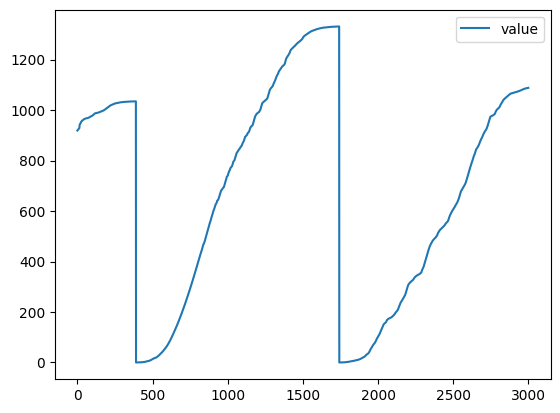

In [64]:
# Plot de energia
inv_1_energy_dataset = df_energy[['time','value']].loc[df_energy['variable'] == 'inv_hw_1.01_daily_energy']
inv_1_energy_dataset[0:3000].plot()

<Axes: >

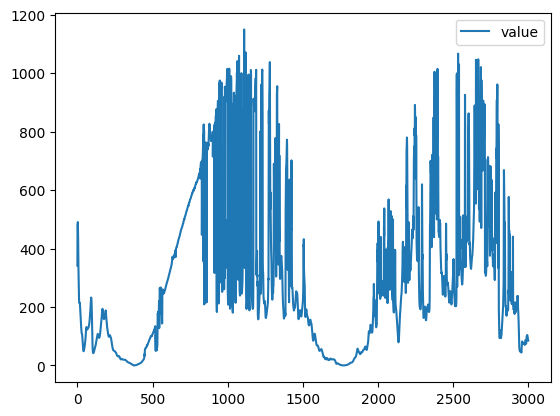

In [65]:
# Plot de Irradiância
irr = df_wheater[['time','value']].loc[df_wheater['variable'] == 'ws_hukseflux_01_ghi_power']
irr[0:3000].plot()

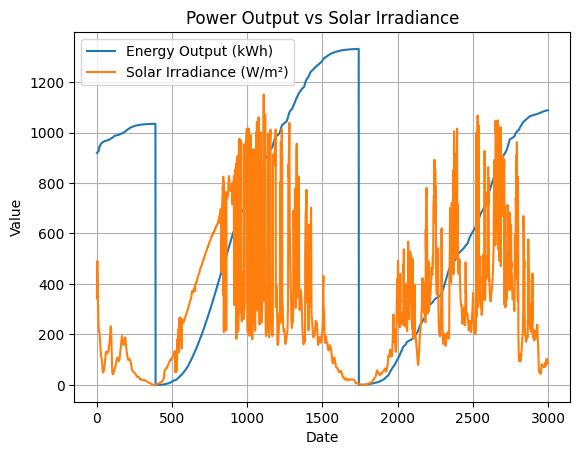

In [71]:
inv_1_energy_dataset['irr'] = irr['value']
inv_1_energy_dataset[0:3000].plot()
plt.title("Power Output vs Solar Irradiance")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(["Energy Output (kWh)", "Solar Irradiance (W/m²)"])
plt.grid()